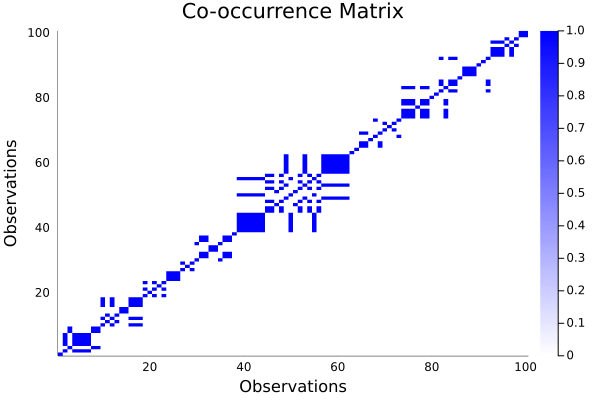

In [4]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(1)

dirichlet_scale = ones(Float64, 10)
data_parameters = Ntl.Models.MultinomialParameters(5, dirichlet_scale)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(prior=phi_prior, sample_parameter_posterior=true)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

mixture_model = Ntl.Models.Mixture(ntl_cluster_parameters, data_parameters)
n = 100
mixture = Ntl.Generate.generate(mixture_model, n=n)
data = Matrix(transpose(Matrix(mixture[:, 2:end])))
training_data = data[:, 1:n]
true_clustering = mixture[:, 1]
true_number_of_clusters = length(unique(true_clustering))
Ntl.Plot.plot_co_occurrence_matrix(true_clustering)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:19
Progress: 100%|█████████████████████████████████████████| Time: 0:00:20
Progress: 100%|█████████████████████████████████████████| Time: 0:00:18
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


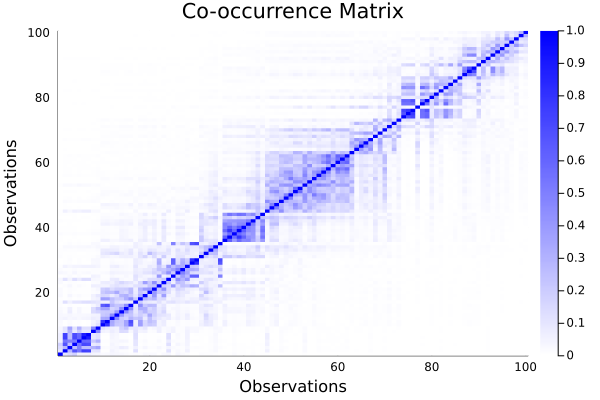

In [5]:
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=2000, num_burn_in=0, 
                                          assignment_types=["random", "all same cluster", "all different clusters"])
gibbs_output = Ntl.Fitter.fit(training_data, mixture_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(gibbs_output["assignments"][:, :, 1])

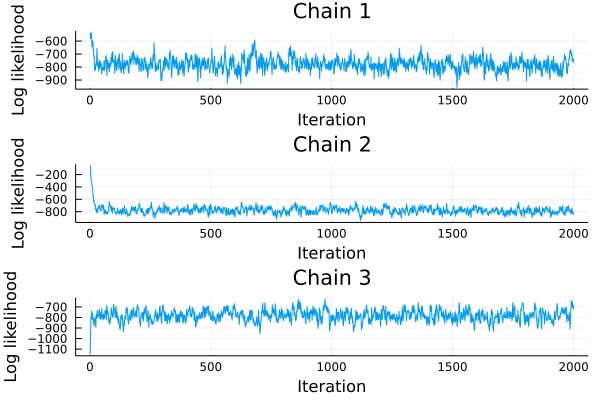

In [3]:
Ntl.Plot.plot_log_likelihoods(gibbs_output["log likelihood"])

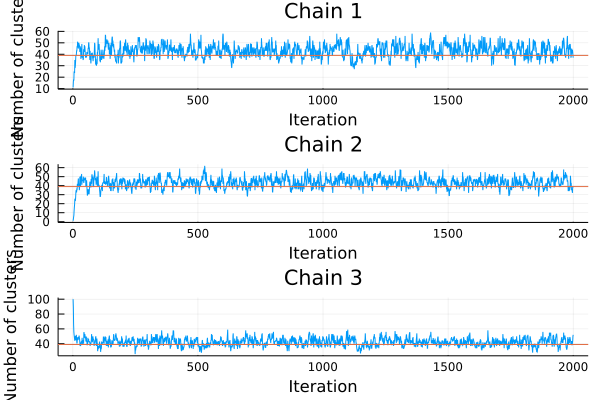

In [4]:
Ntl.Plot.plot_num_clusters(gibbs_output["assignments"], true_number=true_number_of_clusters)

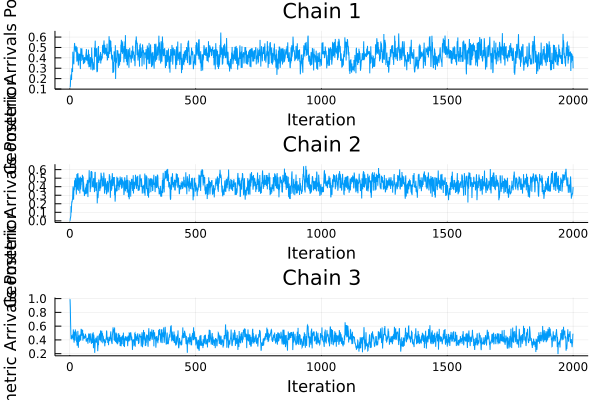

In [5]:
Ntl.Plot.plot_trace(gibbs_output["arrival posterior"], ylabel="Geometric Arrivals Posterior")

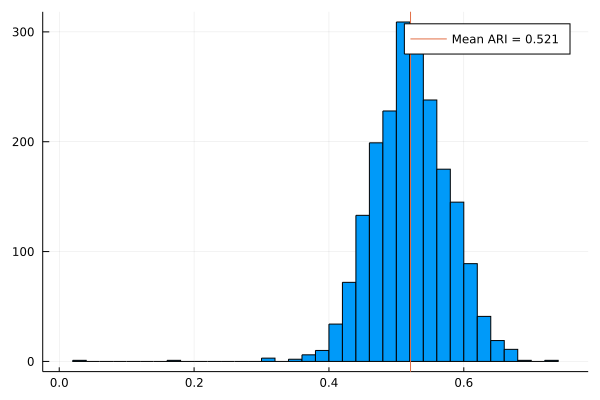

In [6]:
Ntl.Plot.plot_ari_posterior_distribution(true_clustering, gibbs_output["assignments"][:, :, 1])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


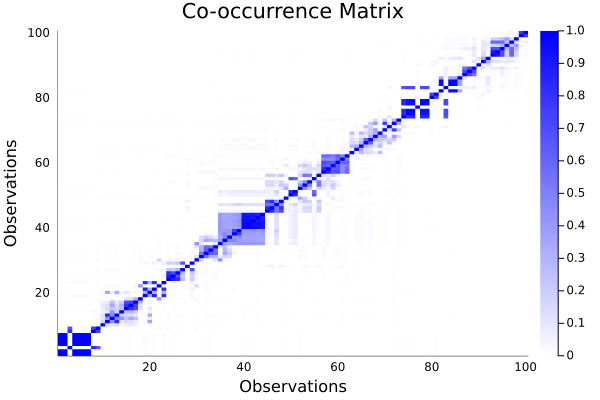

In [15]:
metropolis_hastings_sampler = Ntl.Samplers.MetropolisHastingsSampler(num_iterations=1000, num_burn_in=0, proposal_radius=5, skip=1, adaptive=true,
                                                                     assignment_types=["random", "all same cluster", "all different clusters"])
mcmc_output = Ntl.Fitter.fit(training_data, mixture_model, metropolis_hastings_sampler) 
Ntl.Plot.plot_co_occurrence_matrix(mcmc_output["assignments"][:, :, 1])

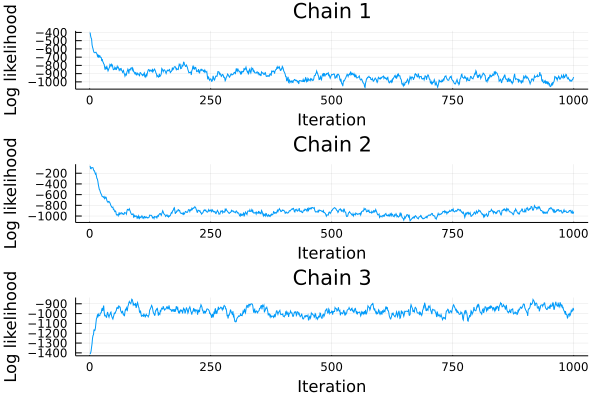

In [16]:
Ntl.Plot.plot_log_likelihoods(mcmc_output["log likelihood"])

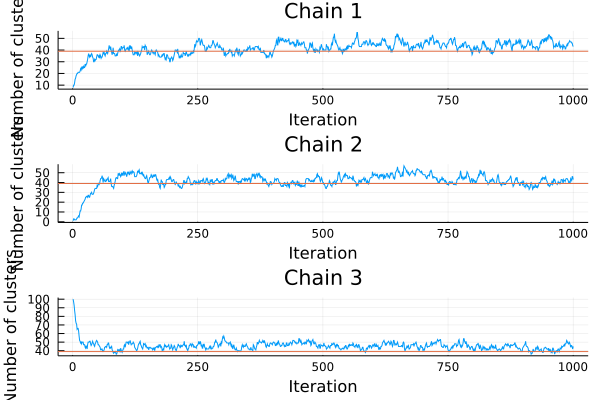

In [17]:
Ntl.Plot.plot_num_clusters(mcmc_output["assignments"], true_number=true_number_of_clusters)

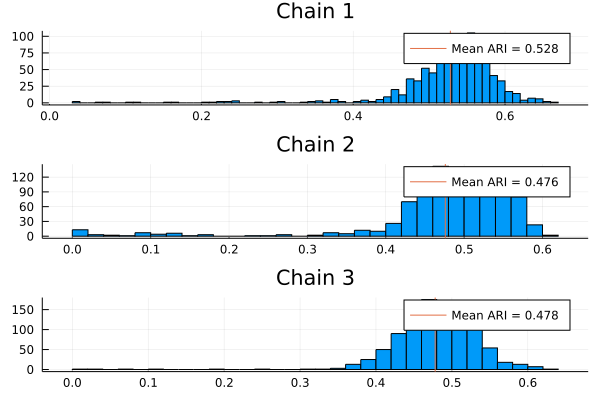

In [18]:
Ntl.Plot.plot_ari_posterior_distribution(true_clustering, mcmc_output["assignments"])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:24
Progress: 100%|█████████████████████████████████████████| Time: 0:00:23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


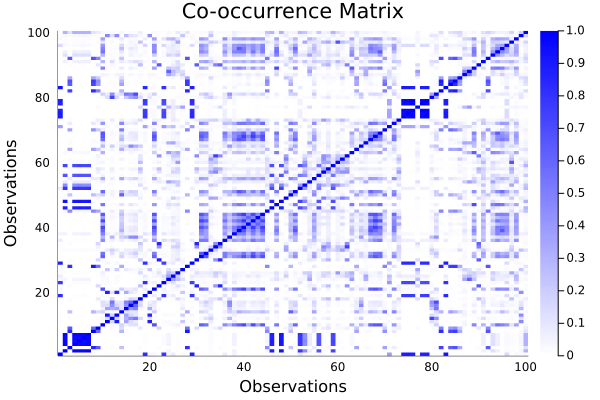

In [11]:
dp_cluster_parameters = Ntl.Models.DpParameters(1)
dp_mixture = Ntl.Models.Mixture(dp_cluster_parameters, data_parameters)
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=10000, num_burn_in=0, 
                                          assignment_types=["random", "all same cluster", "all different clusters"])
dp_output = Ntl.Fitter.fit(training_data, dp_mixture, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(dp_output["assignments"][:, :, 1])

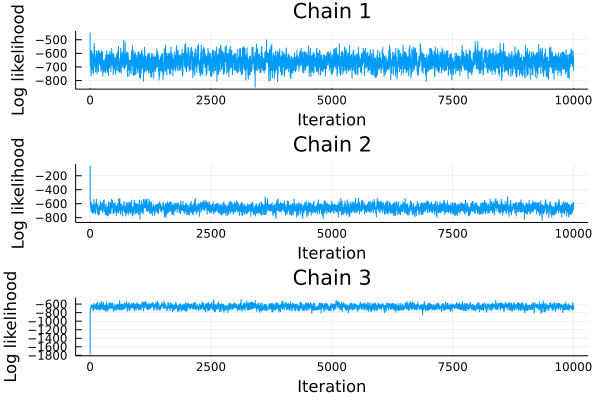

In [12]:
Ntl.Plot.plot_log_likelihoods(dp_output["log likelihood"])

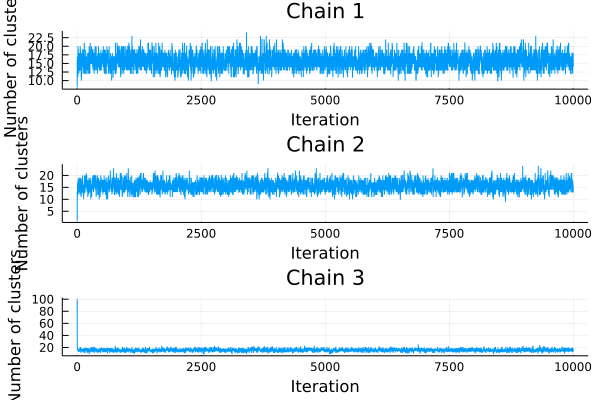

In [13]:
Ntl.Plot.plot_num_clusters(dp_output["assignments"])

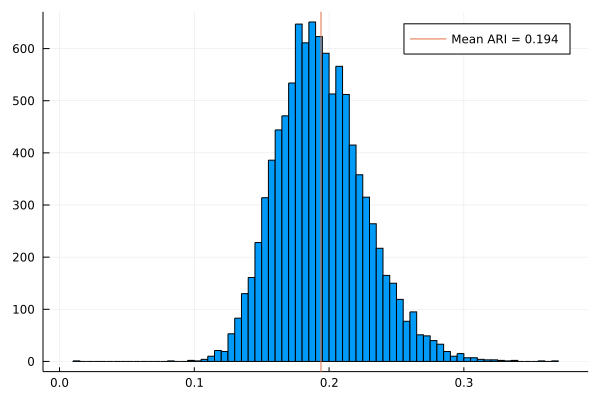

In [14]:
Ntl.Plot.plot_ari_posterior_distribution(true_clustering, dp_output["assignments"][:, :, 1])